# Iris Flower Challenge


## Support Vector Machine - Classification Algorithm 

## 1 Introduction 

In this document we will predict the type of flowers measuring the width and length of the petals and sepals of the flowers. 

For this, we will use one of the Sklearn datasets called 'iris'.

## 2 Import Necessary Libraries 

In [3]:
import pandas as pd
import pandas as pd  #data management and data analysis
import seaborn as sn # data visualization
import matplotlib.pyplot as plt # data visualization
import sklearn #machine learning library

from sklearn import svm # support vector machine
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import confusion_matrix, classification_report #sklearn metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#standarscaler => pre-processing

#open a new window and display the graphics in that way
%matplotlib inline 

## 3 Explore the data 

In [4]:
#load the dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
#Check the "keys or features" of the attributes and the general description:
print('keys: {}'.format(iris.keys())) 
print('feature names: {}'.format(iris.feature_names))
print(iris.DESCR)

 #Other option to see the keys is using dir(iris) 

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43 

In [6]:
#convert the data in a data frame
dfIris = pd.DataFrame(iris.data, columns = iris.feature_names)

dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#define the target
dfIris['target'] = iris.target
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#check the names of the targets
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Comments: It looks like there are tree type of targets (setosa, versicolor and virginica), to which the numbers 0/1/2 are associated. 

In order to make easier the data frame reading, we will create a lambda function to tranform the numbers in text.

In [9]:
#create the lambda funtion
dfIris['flower_name'] = dfIris.target.apply(lambda x: iris.target_names[x])
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 4 Data Visualization 

Before visualizing the data, let's create three separate data frames to split the different types of target.

In [10]:
#data frame for setosa target
dfIris0 = dfIris[dfIris.target==0]
dfIris0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
#data frame for setosa versicolor
dfIris1 = dfIris[dfIris.target==1]
dfIris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
#data frame for setosa virginica
dfIris2 = dfIris[dfIris.target==2]
dfIris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


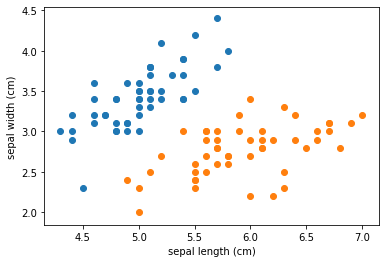

In [13]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(dfIris0['sepal length (cm)'], dfIris0['sepal width (cm)'])
plt.scatter(dfIris1['sepal length (cm)'], dfIris1['sepal width (cm)'])

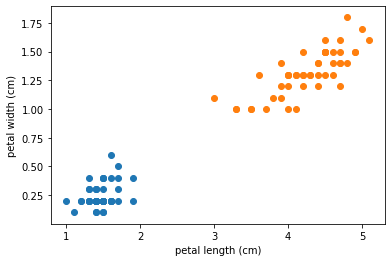

In [14]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(dfIris0['petal length (cm)'], dfIris0['petal width (cm)'])
plt.scatter(dfIris1['petal length (cm)'], dfIris1['petal width (cm)'])

## 5 Prediction and Evaluation 

### 5.1 Response and Feature Variables 

Firstly, separate the dataset into response variables (data to analyze) and feature variables (the target to achieve).

In [15]:
X = dfIris.drop(['target', 'flower_name'], axis = 'columns')
y = dfIris.target

# X variable = store the data
# y variable = store the classes/targets

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 5.2 Training and Test Split

Secondly, split the data into training set and testing set, using the package train_test_split.

In [17]:
#Use the 20% of the data for test and the 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
len(X_train)

120

In [19]:
len(X_test)

30

### 5.3 Apply Support Vector Machine Classifier

#### 5.3.1 Simple Support Vector Machine Classifier# 

We can improve the measure of the accuracy of the model includding a linear Kernel:

In [23]:
#Set up the SVM Classifier algorithm 
model =svm.SVC()

#Build the model on training data
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
#Predict the values of test group
pred_model = model.predict(X_test)

In [25]:
model.score(X_test, y_test)

0.9666666666666667

Let's see how our model performed, using the objects Classification_report and confussion_matrix:

In [26]:
#classification report
print(classification_report(y_test, pred_model))

#confussion matrix
print(confusion_matrix(y_test, pred_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


#### 5.3.2 Support Vector Machine Classifier with Kernel

We can improve the measure of the accuracy of the model includding a linear Kernel:

In [27]:
#Set up the SVM Classifier algorithm 
model1 =SVC(kernel = 'linear')

#Build the model on training data
model1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
#Predict the values of test group
pred_model1 = model1.predict(X_test)

In [29]:
model1.score(X_test, y_test)

1.0

Let's see how our model performed, using the objects Classification_report and confussion_matrix:

In [30]:
#classification report
print(classification_report(y_test, pred_model1))

#confussion matrix
print(confusion_matrix(y_test, pred_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


### 5.4 Prediction with new values

In [33]:
#Set up the new values to analyze
X_new = [[7.0, 4.3, 2.2, 1.5,]]

#Predict the values of the test group applying the model with better accuracy rate
y_new = model1.predict(X_new)

y_new

array([1])

Results => The new data correspond to the type of plant 1, that is "versicolor".